As mel_model_bins_sim, but with much simpler model.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.integrate import odeint
from astropy import cosmology
from IPython.display import Image
import pickle

In [2]:
# Steven's emcee stuff

from convenience import run_emcee
from pdfs import norm_logpdf, beta_logpdf
import plots

In [3]:
%matplotlib inline
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 12

In [4]:
C = cosmology.FlatLambdaCDM(70.0, 0.3)

In [5]:
basic_states = ['BD', 'RD', 'RE']
states = []
for i in range(6):
    for s in basic_states:
        states.append('{}{}'.format(s, i))
states.append('NE')
states = pd.Index(states)
nStates = len(states)

In [6]:
states

Index(['BD0', 'RD0', 'RE0', 'BD1', 'RD1', 'RE1', 'BD2', 'RD2', 'RE2', 'BD3',
       'RD3', 'RE3', 'BD4', 'RD4', 'RE4', 'BD5', 'RD5', 'RE5', 'NE'],
      dtype='object')

In [7]:
rate_labels = [['$r_{' + '{} \\rightarrow {}'.format(s2, s1) + '}$' for s2 in states] for s1 in states]
rate_labels = pd.DataFrame(index='to ' + states, columns='from ' + states, data=rate_labels)
rate_evol_labels = rate_labels.replace('\$r', '$\dot{r}', regex=True)
N_labels = '$N_{' + states + '}$'

In [8]:
N_labels

Index(['$N_{BD0}$', '$N_{RD0}$', '$N_{RE0}$', '$N_{BD1}$', '$N_{RD1}$',
       '$N_{RE1}$', '$N_{BD2}$', '$N_{RD2}$', '$N_{RE2}$', '$N_{BD3}$',
       '$N_{RD3}$', '$N_{RE3}$', '$N_{BD4}$', '$N_{RD4}$', '$N_{RE4}$',
       '$N_{BD5}$', '$N_{RD5}$', '$N_{RE5}$', '$N_{NE}$'],
      dtype='object')

In [9]:
rate_labels

,from BD0,from RD0,from RE0,from BD1,from RD1,from RE1,from BD2,from RD2,from RE2,from BD3,from RD3,from RE3,from BD4,from RD4,from RE4,from BD5,from RD5,from RE5,from NE
to BD0,$r_{BD0 \rightarrow BD0}$,$r_{RD0 \rightarrow BD0}$,$r_{RE0 \rightarrow BD0}$,$r_{BD1 \rightarrow BD0}$,$r_{RD1 \rightarrow BD0}$,$r_{RE1 \rightarrow BD0}$,$r_{BD2 \rightarrow BD0}$,$r_{RD2 \rightarrow BD0}$,$r_{RE2 \rightarrow BD0}$,$r_{BD3 \rightarrow BD0}$,$r_{RD3 \rightarrow BD0}$,$r_{RE3 \rightarrow BD0}$,$r_{BD4 \rightarrow BD0}$,$r_{RD4 \rightarrow BD0}$,$r_{RE4 \rightarrow BD0}$,$r_{BD5 \rightarrow BD0}$,$r_{RD5 \rightarrow BD0}$,$r_{RE5 \rightarrow BD0}$,$r_{NE \rightarrow BD0}$
to RD0,$r_{BD0 \rightarrow RD0}$,$r_{RD0 \rightarrow RD0}$,$r_{RE0 \rightarrow RD0}$,$r_{BD1 \rightarrow RD0}$,$r_{RD1 \rightarrow RD0}$,$r_{RE1 \rightarrow RD0}$,$r_{BD2 \rightarrow RD0}$,$r_{RD2 \rightarrow RD0}$,$r_{RE2 \rightarrow RD0}$,$r_{BD3 \rightarrow RD0}$,$r_{RD3 \rightarrow RD0}$,$r_{RE3 \rightarrow RD0}$,$r_{BD4 \rightarrow RD0}$,$r_{RD4 \rightarrow RD0}$,$r_{RE4 \rightarrow RD0}$,$r_{BD5 \rightarrow RD0}$,$r_{RD5 \rightarrow RD0}$,$r_{RE5 \rightarrow RD0}$,$r_{NE \rightarrow RD0}$
to RE0,$r_{BD0 \rightarrow RE0}$,$r_{RD0 \rightarrow RE0}$,$r_{RE0 \rightarrow RE0}$,$r_{BD1 \rightarrow RE0}$,$r_{RD1 \rightarrow RE0}$,$r_{RE1 \rightarrow RE0}$,$r_{BD2 \rightarrow RE0}$,$r_{RD2 \rightarrow RE0}$,$r_{RE2 \rightarrow RE0}$,$r_{BD3 \rightarrow RE0}$,$r_{RD3 \rightarrow RE0}$,$r_{RE3 \rightarrow RE0}$,$r_{BD4 \rightarrow RE0}$,$r_{RD4 \rightarrow RE0}$,$r_{RE4 \rightarrow RE0}$,$r_{BD5 \rightarrow RE0}$,$r_{RD5 \rightarrow RE0}$,$r_{RE5 \rightarrow RE0}$,$r_{NE \rightarrow RE0}$
to BD1,$r_{BD0 \rightarrow BD1}$,$r_{RD0 \rightarrow BD1}$,$r_{RE0 \rightarrow BD1}$,$r_{BD1 \rightarrow BD1}$,$r_{RD1 \rightarrow BD1}$,$r_{RE1 \rightarrow BD1}$,$r_{BD2 \rightarrow BD1}$,$r_{RD2 \rightarrow BD1}$,$r_{RE2 \rightarrow BD1}$,$r_{BD3 \rightarrow BD1}$,$r_{RD3 \rightarrow BD1}$,$r_{RE3 \rightarrow BD1}$,$r_{BD4 \rightarrow BD1}$,$r_{RD4 \rightarrow BD1}$,$r_{RE4 \rightarrow BD1}$,$r_{BD5 \rightarrow BD1}$,$r_{RD5 \rightarrow BD1}$,$r_{RE5 \rightarrow BD1}$,$r_{NE \rightarrow BD1}$
to RD1,$r_{BD0 \rightarrow RD1}$,$r_{RD0 \rightarrow RD1}$,$r_{RE0 \rightarrow RD1}$,$r_{BD1 \rightarrow RD1}$,$r_{RD1 \rightarrow RD1}$,$r_{RE1 \rightarrow RD1}$,$r_{BD2 \rightarrow RD1}$,$r_{RD2 \rightarrow RD1}$,$r_{RE2 \rightarrow RD1}$,$r_{BD3 \rightarrow RD1}$,$r_{RD3 \rightarrow RD1}$,$r_{RE3 \rightarrow RD1}$,$r_{BD4 \rightarrow RD1}$,$r_{RD4 \rightarrow RD1}$,$r_{RE4 \rightarrow RD1}$,$r_{BD5 \rightarrow RD1}$,$r_{RD5 \rightarrow RD1}$,$r_{RE5 \rightarrow RD1}$,$r_{NE \rightarrow RD1}$
to RE1,$r_{BD0 \rightarrow RE1}$,$r_{RD0 \rightarrow RE1}$,$r_{RE0 \rightarrow RE1}$,$r_{BD1 \rightarrow RE1}$,$r_{RD1 \rightarrow RE1}$,$r_{RE1 \rightarrow RE1}$,$r_{BD2 \rightarrow RE1}$,$r_{RD2 \rightarrow RE1}$,$r_{RE2 \rightarrow RE1}$,$r_{BD3 \rightarrow RE1}$,$r_{RD3 \rightarrow RE1}$,$r_{RE3 \rightarrow RE1}$,$r_{BD4 \rightarrow RE1}$,$r_{RD4 \rightarrow RE1}$,$r_{RE4 \rightarrow RE1}$,$r_{BD5 \rightarrow RE1}$,$r_{RD5 \rightarrow RE1}$,$r_{RE5 \rightarrow RE1}$,$r_{NE \rightarrow RE1}$
to BD2,$r_{BD0 \rightarrow BD2}$,$r_{RD0 \rightarrow BD2}$,$r_{RE0 \rightarrow BD2}$,$r_{BD1 \rightarrow BD2}$,$r_{RD1 \rightarrow BD2}$,$r_{RE1 \rightarrow BD2}$,$r_{BD2 \rightarrow BD2}$,$r_{RD2 \rightarrow BD2}$,$r_{RE2 \rightarrow BD2}$,$r_{BD3 \rightarrow BD2}$,$r_{RD3 \rightarrow BD2}$,$r_{RE3 \rightarrow BD2}$,$r_{BD4 \rightarrow BD2}$,$r_{RD4 \rightarrow BD2}$,$r_{RE4 \rightarrow BD2}$,$r_{BD5 \rightarrow BD2}$,$r_{RD5 \rightarrow BD2}$,$r_{RE5 \rightarrow BD2}$,$r_{NE \rightarrow BD2}$
to RD2,$r_{BD0 \rightarrow RD2}$,$r_{RD0 \rightarrow RD2}$,$r_{RE0 \rightarrow RD2}$,$r_{BD1 \rightarrow RD2}$,$r_{RD1 \rightarrow RD2}$,$r_{RE1 \rightarrow RD2}$,$r_{BD2 \rightarrow RD2}$,$r_{RD2 \rightarrow RD2}$,$r_{RE2 \rightarrow RD2}$,$r_{BD3 \rightarrow RD2}$,$r_{RD3 \rightarrow RD2}$,$r_{RE3 \rightarrow RD2}$,$r_{BD4 \r

In [10]:
# Set initial number densities
N0 = pd.Series(index=N_labels, data=np.zeros(nStates))

# Set rates per galaxy in Gyr^{-1} at fiducial redshift
rates = pd.DataFrame(index='to ' + states, columns='from ' + states,
                     data=np.zeros((nStates, nStates)))

# Modelling rates as linear function of cosmic time
#(for simplicity, should probably choose someting more appropriate)
rates_evol = pd.DataFrame(index='to ' + states, columns='from ' + states,
                     data=np.zeros((nStates, nStates)))

# Select which parameters to fit.
fit_N0 = pd.Series(index=N_labels, data=np.zeros(nStates, np.bool))
fit_rates = pd.DataFrame(index='to ' + states, columns='from ' + states,
                         data=np.zeros((nStates, nStates), np.bool))
fit_rates_evol = pd.DataFrame(index='to ' + states, columns='from ' + states,
                         data=np.zeros((nStates, nStates), np.bool))

In [11]:
rate_evol_labels

,from BD0,from RD0,from RE0,from BD1,from RD1,from RE1,from BD2,from RD2,from RE2,from BD3,from RD3,from RE3,from BD4,from RD4,from RE4,from BD5,from RD5,from RE5,from NE
to BD0,$\dot{r}_{BD0 \rightarrow BD0}$,$\dot{r}_{RD0 \rightarrow BD0}$,$\dot{r}_{RE0 \rightarrow BD0}$,$\dot{r}_{BD1 \rightarrow BD0}$,$\dot{r}_{RD1 \rightarrow BD0}$,$\dot{r}_{RE1 \rightarrow BD0}$,$\dot{r}_{BD2 \rightarrow BD0}$,$\dot{r}_{RD2 \rightarrow BD0}$,$\dot{r}_{RE2 \rightarrow BD0}$,$\dot{r}_{BD3 \rightarrow BD0}$,$\dot{r}_{RD3 \rightarrow BD0}$,$\dot{r}_{RE3 \rightarrow BD0}$,$\dot{r}_{BD4 \rightarrow BD0}$,$\dot{r}_{RD4 \rightarrow BD0}$,$\dot{r}_{RE4 \rightarrow BD0}$,$\dot{r}_{BD5 \rightarrow BD0}$,$\dot{r}_{RD5 \rightarrow BD0}$,$\dot{r}_{RE5 \rightarrow BD0}$,$\dot{r}_{NE \rightarrow BD0}$
to RD0,$\dot{r}_{BD0 \rightarrow RD0}$,$\dot{r}_{RD0 \rightarrow RD0}$,$\dot{r}_{RE0 \rightarrow RD0}$,$\dot{r}_{BD1 \rightarrow RD0}$,$\dot{r}_{RD1 \rightarrow RD0}$,$\dot{r}_{RE1 \rightarrow RD0}$,$\dot{r}_{BD2 \rightarrow RD0}$,$\dot{r}_{RD2 \rightarrow RD0}$,$\dot{r}_{RE2 \rightarrow RD0}$,$\dot{r}_{BD3 \rightarrow RD0}$,$\dot{r}_{RD3 \rightarrow RD0}$,$\dot{r}_{RE3 \rightarrow RD0}$,$\dot{r}_{BD4 \rightarrow RD0}$,$\dot{r}_{RD4 \rightarrow RD0}$,$\dot{r}_{RE4 \rightarrow RD0}$,$\dot{r}_{BD5 \rightarrow RD0}$,$\dot{r}_{RD5 \rightarrow RD0}$,$\dot{r}_{RE5 \rightarrow RD0}$,$\dot{r}_{NE \rightarrow RD0}$
to RE0,$\dot{r}_{BD0 \rightarrow RE0}$,$\dot{r}_{RD0 \rightarrow RE0}$,$\dot{r}_{RE0 \rightarrow RE0}$,$\dot{r}_{BD1 \rightarrow RE0}$,$\dot{r}_{RD1 \rightarrow RE0}$,$\dot{r}_{RE1 \rightarrow RE0}$,$\dot{r}_{BD2 \rightarrow RE0}$,$\dot{r}_{RD2 \rightarrow RE0}$,$\dot{r}_{RE2 \rightarrow RE0}$,$\dot{r}_{BD3 \rightarrow RE0}$,$\dot{r}_{RD3 \rightarrow RE0}$,$\dot{r}_{RE3 \rightarrow RE0}$,$\dot{r}_{BD4 \rightarrow RE0}$,$\dot{r}_{RD4 \rightarrow RE0}$,$\dot{r}_{RE4 \rightarrow RE0}$,$\dot{r}_{BD5 \rightarrow RE0}$,$\dot{r}_{RD5 \rightarrow RE0}$,$\dot{r}_{RE5 \rightarrow RE0}$,$\dot{r}_{NE \rightarrow RE0}$
to BD1,$\dot{r}_{BD0 \rightarrow BD1}$,$\dot{r}_{RD0 \rightarrow BD1}$,$\dot{r}_{RE0 \rightarrow BD1}$,$\dot{r}_{BD1 \rightarrow BD1}$,$\dot{r}_{RD1 \rightarrow BD1}$,$\dot{r}_{RE1 \rightarrow BD1}$,$\dot{r}_{BD2 \rightarrow BD1}$,$\dot{r}_{RD2 \rightarrow BD1}$,$\dot{r}_{RE2 \rightarrow BD1}$,$\dot{r}_{BD3 \rightarrow BD1}$,$\dot{r}_{RD3 \rightarrow BD1}$,$\dot{r}_{RE3 \rightarrow BD1}$,$\dot{r}_{BD4 \rightarrow BD1}$,$\dot{r}_{RD4 \rightarrow BD1}$,$\dot{r}_{RE4 \rightarrow BD1}$,$\dot{r}_{BD5 \rightarrow BD1}$,$\dot{r}_{RD5 \rightarrow BD1}$,$\dot{r}_{RE5 \rightarrow BD1}$,$\dot{r}_{NE \rightarrow BD1}$
to RD1,$\dot{r}_{BD0 \rightarrow RD1}$,$\dot{r}_{RD0 \rightarrow RD1}$,$\dot{r}_{RE0 \rightarrow RD1}$,$\dot{r}_{BD1 \rightarrow RD1}$,$\dot{r}_{RD1 \rightarrow RD1}$,$\dot{r}_{RE1 \rightarrow RD1}$,$\dot{r}_{BD2 \rightarrow RD1}$,$\dot{r}_{RD2 \rightarrow RD1}$,$\dot{r}_{RE2 \rightarrow RD1}$,$\dot{r}_{BD3 \rightarrow RD1}$,$\dot{r}_{RD3 \rightarrow RD1}$,$\dot{r}_{RE3 \rightarrow RD1}$,$\dot{r}_{BD4 \rightarrow RD1}$,$\dot{r}_{RD4 \rightarrow RD1}$,$\dot{r}_{RE4 \rightarrow RD1}$,$\dot{r}_{BD5 \rightarrow RD1}$,$\dot{r}_{RD5 \rightarrow RD1}$,$\dot{r}_{RE5 \rightarrow RD1}$,$\dot{r}_{NE \rightarrow RD1}$
to RE1,$\dot{r}_{BD0 \rightarrow RE1}$,$\dot{r}_{RD0 \rightarrow RE1}$,$\dot{r}_{RE0 \rightarrow RE1}$,$\dot{r}_{BD1 \rightarrow RE1}$,$\dot{r}_{RD1 \rightarrow RE1}$,$\dot{r}_{RE1 \rightarrow RE1}$,$\dot{r}_{BD2 \rightarrow RE1}$,$\dot{r}_{RD2 \rightarrow RE1}$,$\dot{r}_{RE2 \rightarrow RE1}$,$\dot{r}_{BD3 \rightarrow RE1}$,$\dot{r}_{RD3 \rightarrow RE1}$,$\dot{r}_{RE3 \rightarrow RE1}$,$\dot{r}_{BD4 \rightarrow RE1}$,$\dot{r}_{RD4 \rightarrow RE1}$,$\dot{r}_{RE4 \rightarrow RE1}$,$\dot{r}_{BD5 \rightarrow RE1}$,$\dot{r}_{RD5 \rightarrow RE1}$,$\dot{r}_{RE5 \rightarrow RE1}$,$\dot{r}_{NE \rightarrow RE1}$
to BD2,$\dot{r}_{BD0 \rightarrow BD2}$,$\dot{r}_{RD0 \rightarrow BD2}$,$\dot{r}_{RE0 \rightarrow BD2}$,$\dot{r}_{BD1 \rightarrow BD2}$,$\dot{r}_{

Basic differential equations:

Blue Disks in stellar mass bin $i \in \{1,2,3,4\}$ may:
* spontaneously form in lowest mass bin, at a total rate $f_{BD_1}$
* transition from the previous mass bin (due to SF and minor mergers), at an individual rate $r_{BD_{i-1} \rightarrow BD_{i}}$
* transition to Red Discs in same mass bin, at an individual rate $r_{BD_{i} \rightarrow RD_{i}}$
* transition to Red Ellipticals in same mass bin, at an individual rate $r_{BD_{i} \rightarrow RE_{i}}$
* transition to the next mass bin (due to SF or minor mergers), at an individual rate $r_{BD_{i} \rightarrow BD_{i+1}}$

For convenience we can define $N_{BD_0} = 1$, such that $r_{BD_0 \rightarrow BD_1} = f_{BD_1}$, the spontaneous formation rate.

$\frac{dN_{BD_{i}}}{dt} = + N_{BD_{i-1}} r_{BD_{i-1} \rightarrow BD_{i}} - N_{BD_{i}} \, (r_{BD_{i} \rightarrow RD_{i}} + r_{BD_{i} \rightarrow RE_{i}} + r_{BD_{i} \rightarrow BD_{i+1}})$

Red Disks in stellar mass bin $i \in \{1,2,3,4\}$ may:
* transition from Blue Discs in same mass bin, at an individual rate $r_{BD_{i} \rightarrow RD_{i}}$
* transition to Red Ellipticals in same mass bin, at an individual rate $r_{D_{i} \rightarrow RE_{i}}$

$\frac{dN_{RD_{i}}}{dt} = - N_{RD_{i}} \, r_{RD_{i} \rightarrow RE_{i}} + N_{BD_{i}} \, r_{BD_{i} \rightarrow RD_{i}}$

Red Ellipticals in stellar mass bin $i \in \{1,2,3,4\}$ may:
* transition from the previous mass bin (due to equal mergers), at an individual rate $r_{RE_{i-1} \rightarrow RE_{i}}$
* transition from Blue Discs in same mass bin, at an individual rate $r_{BD_{i} \rightarrow RE_{i}}$
* transition from Red Discs in same mass bin, at an individual rate $r_{RD_{i} \rightarrow RE_{i}}$
* transition to the next mass bin (due to mergers), at an individual rate $r_{RE_{i} \rightarrow RE_{i+1}}$
* transition to None Existent (due to mergers), at an individual rate $r_{RE_{i} \rightarrow NE}$

Note that $N_{RE_0} = 0$ always.


$\frac{dN_{RE_{i}}}{dt} = + N_{RD_{i}} \, r_{RD_{i} \rightarrow RE_{i}} + N_{BD_{i}} \, r_{BD_{i} \rightarrow RE_{i}} + N_{RE_{i-1}} \, r_{RE_{i-1} \rightarrow RE_{i}} - N_{RE_{i}} ( r_{RE_{i} \rightarrow RE_{i+1}} + r_{RE_{i} \rightarrow NE})$ 

The None Existent state and all mass bins beyond the maximum are equivalent.  They do not contribute to the normalisation of the number densities and do need to be tracked.

Must be careful about the number density normalisation – for this to make sense it needs to be done across _all_ states, not just within each mass bin. The total number density is fit to data at the initial redshift, and hence constrained to ~unity, but then it may evolve as galaxies are created and desroyed.  However, when comparing to the data, we normalise the total number density to unity for all redshfts except the first, since the data is normalised in this manner.

In [12]:
fit_N0['$N_{BD0}$'] = False
fit_N0['$N_{RD0}$'] = False
fit_N0['$N_{RE0}$'] = False
fit_N0['$N_{BD1}$'] = True
fit_N0['$N_{RD1}$'] = True
fit_N0['$N_{RE1}$'] = True
fit_N0['$N_{BD2}$'] = True
fit_N0['$N_{RD2}$'] = True
fit_N0['$N_{RE2}$'] = True
fit_N0['$N_{BD3}$'] = True
fit_N0['$N_{RD3}$'] = True
fit_N0['$N_{RE3}$'] = True
fit_N0['$N_{BD4}$'] = True
fit_N0['$N_{RD4}$'] = True
fit_N0['$N_{RE4}$'] = True
fit_N0['$N_{BD5}$'] = False
fit_N0['$N_{RD5}$'] = False
fit_N0['$N_{RE5}$'] = False
fit_N0['$N_{NE}$']  = False

N0['$N_{BD0}$'] = 0
N0['$N_{RD0}$'] = 0
N0['$N_{RE0}$'] = 0
N0['$N_{BD1}$'] = 0.7
N0['$N_{RD1}$'] = 0.1
N0['$N_{RE1}$'] = 0.2
N0['$N_{BD2}$'] = 0.6
N0['$N_{RD2}$'] = 0.1
N0['$N_{RE2}$'] = 0.3
N0['$N_{BD3}$'] = 0.5
N0['$N_{RD3}$'] = 0.2
N0['$N_{RE3}$'] = 0.3
N0['$N_{BD4}$'] = 0.4
N0['$N_{RD4}$'] = 0.2
N0['$N_{RE4}$'] = 0.4
N0['$N_{BD5}$'] = 0
N0['$N_{RD5}$'] = 0
N0['$N_{RE5}$'] = 0
N0['$N_{NE}$']  = 0

N0 /= N0.values.sum()
N0['$N_{BD0}$'] = 1
N0

$N_{BD0}$    1.000
$N_{RD0}$    0.000
$N_{RE0}$    0.000
$N_{BD1}$    0.175
$N_{RD1}$    0.025
$N_{RE1}$    0.050
$N_{BD2}$    0.150
$N_{RD2}$    0.025
$N_{RE2}$    0.075
$N_{BD3}$    0.125
$N_{RD3}$    0.050
$N_{RE3}$    0.075
$N_{BD4}$    0.100
$N_{RD4}$    0.050
$N_{RE4}$    0.100
$N_{BD5}$    0.000
$N_{RD5}$    0.000
$N_{RE5}$    0.000
$N_{NE}$     0.000
dtype: float64

In [13]:
#for i in range(5):
#    fit_rates['from BD{}'.format(i)]['to BD{}'.format(i+1)] = True
#    rates['from BD{}'.format(i)]['to BD{}'.format(i+1)] = 0.01

for i in range(1, 5):
    fit_rates['from BD{}'.format(i)]['to RD{}'.format(i)] = True
    rates['from BD{}'.format(i)]['to RD{}'.format(i)] = 0.05
    fit_rates['from BD{}'.format(i)]['to RE{}'.format(i)] = True
    rates['from BD{}'.format(i)]['to RE{}'.format(i)] = 0.01
    fit_rates['from RD{}'.format(i)]['to RE{}'.format(i)] = True
    rates['from RD{}'.format(i)]['to RE{}'.format(i)] = 0.03
    #fit_rates['from RE{}'.format(i)]['to NE'] = True
    #rates['from RE{}'.format(i)]['to NE'] = 0.005 * i

#for i in range(1, 5):
#    fit_rates['from RE{}'.format(i)]['to RE{}'.format(i+1)] = True
#    rates['from RE{}'.format(i)]['to RE{}'.format(i+1)] = 0.003 * i

for s in states:
    rates['from ' + s]['to ' + s] = 0
    if s != 'BD0':
        rates['from ' + s]['to ' + s] = - rates['from ' + s].sum()

In [14]:
# No evolution!
#rates_evol['from BD']['to RD'] = 0.01  # comment out this to have no evolution!
#fit_rates_evol['from BD']['to RD'] = True
rates_evol = None
fit_rates_evol=None

In [15]:
rates_evol

In [16]:
fit_rates

,from BD0,from RD0,from RE0,from BD1,from RD1,from RE1,from BD2,from RD2,from RE2,from BD3,from RD3,from RE3,from BD4,from RD4,from RE4,from BD5,from RD5,from RE5,from NE
to BD0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
to RD0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
to RE0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
to BD1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
to RD1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
to RE1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
to BD2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
to RD2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
to RE2,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
to BD3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
def rates_function(rates, rates_evol, t, t0):
    # this used to take pandas DataFrames, but now requires numpy arrays for efficiency
    # shortcut if no evolution
    if rates_evol is None:
        return rates
    rates = rates + rates_evol * (t - t0)
    # ensure rates are valid
    rates = np.clip(rates, 0, 1)
    # * For a closed model the columns of the rates matrix must sum to zero
    #   so there is no creation/destruction of galaxies, this is enforced here.
    # * Creation/destruction of galaxies basically means they move in to or
    #   out of the sample given the selection criteria.
    # * Another possibility is merging, where one galaxies is 'destroyed' in
    #   each merger.
    # * If one wishes to create/destroy galaxies then that could perhaps
    #   be achieved by allowing rates to not sum to zero in each column.
    #   However, the total numbers of galaxies moving between states are
    #   proportional to the number currently in the initial state, which
    #   probably doesn't make much sense for creation.
    #   Alternatively, one could add an additional state(s) representing the pool(s)
    #   from which galaxies are created/destroyed (but this would be evolved itself).
    #   Or one could add additional terms in the differential equation to
    #   describe the creation/destruction of galaxies.
    # * Another issue is multiple selection criteria, e.g. mass bins.
    #   These are essentially different states, and we can model transitions
    #   between them in the same manner: in a small time a galaxy in a given state
    #   will have a particular (potentially time dependent) probability of moving
    #   from one mass bin to the next
    #   (proportional to [SFR + merger accretion rate] / mass_bin_width).
    # * In principle, the rates related to the destruction of galaxies in particular
    #   states due to merging and the mass growth of the merger remnant are related.
    #   In practise this would be pretty complex to manage unless we make some
    #   strict assumptions.  For example, we could assume that only galaxies in the
    #   same state merge (hence ~doubling their mass) and thus require the
    #   destruction rate to be proportional to the mass bin transition rate
    #   (where the factor depends on the width of the mass bin).
    #   If we get too complicated, then it would make more sense to simulate a large
    #   population of individual galaxies rather than consider a small set of states.
    di = np.diag_indices(len(rates))
    rates[di] = 0
    from_sum = rates.sum(0)
    rates[di] = -from_sum
    rates[0, 0] = 0  # no changes to BD0
    return rates

In [18]:
def model(N, t, ratefn, rates, rates_evol, t0):
    rates = ratefn(rates, rates_evol, t, t0)
    return np.dot(rates, N)

In [19]:
with open('results.pickle', 'rb') as handle:
    results = pickle.load(handle, encoding='latin1')

In [20]:
mdata = results['m_centers'][1:]
zdata = results['z_centers']
tdata = C.age(zdata)
z0 = 1.0
t0 = C.age(z0).value

In [21]:
Ndata = pd.DataFrame(index=zdata, columns=N_labels, data=np.zeros((len(zdata), nStates)))
for i in range(1, 5):
    mresults = results['M={:.2f}'.format(mdata[i-1])]
    for key, value in mresults.items():
        if key.startswith('N'):
            state = '{}{}'.format(key[2:], i)
            Ndata['$N_{' + state + '}$'] = value
Ndata = Ndata[::-1]
zdata = zdata[::-1]
tdata = tdata[::-1]
nGal = Ndata.sum(1)

In [22]:
# simulated data for now
# using N0, rates and rates_evol defined above
Ndata = odeint(model, N0, tdata, args=(rates_function, rates, rates_evol, t0))
Ndata = pd.DataFrame(index=zdata, columns='$N_{' + states + '}$', data=Ndata)

In [23]:
Ndata

,$N_{BD0}$,$N_{RD0}$,$N_{RE0}$,$N_{BD1}$,$N_{RD1}$,$N_{RE1}$,$N_{BD2}$,$N_{RD2}$,$N_{RE2}$,$N_{BD3}$,$N_{RD3}$,$N_{RE3}$,$N_{BD4}$,$N_{RD4}$,$N_{RE4}$,$N_{BD5}$,$N_{RD5}$,$N_{RE5}$,$N_{NE}$
0.99,1.0,0.0,0.0,0.175000,0.025000,0.050000,0.150000,0.025000,0.075000,0.125000,0.050000,0.075000,0.100000,0.050000,0.100000,0.0,0.0,0.0,0.0
0.76,1.0,0.0,0.0,0.164308,0.032994,0.052698,0.140836,0.031741,0.077423,0.117363,0.054712,0.077925,0.093890,0.053460,0.102650,0.0,0.0,0.0,0.0
0.54,1.0,0.0,0.0,0.151923,0.041844,0.056232,0.130220,0.039194,0.080586,0.108517,0.059838,0.081646,0.086813,0.057187,0.105999,0.0,0.0,0.0,0.0
0.31,1.0,0.0,0.0,0.136303,0.052299,0.061398,0.116831,0.047979,0.085189,0.097359,0.065724,0.086917,0.077888,0.061404,0.110708,0.0,0.0,0.0,0.0


In [24]:
# strip off unmeasured quantitites
Ndata = Ndata.filter(regex='.*[1234].*')

In [25]:
Ndata = (Ndata.T * nGal).T
Nerr = np.sqrt(Ndata)
Ndata = (Ndata.T / nGal).T
Nerr = (Nerr.T / nGal).T

In [26]:
Ndata

,$N_{BD1}$,$N_{RD1}$,$N_{RE1}$,$N_{BD2}$,$N_{RD2}$,$N_{RE2}$,$N_{BD3}$,$N_{RD3}$,$N_{RE3}$,$N_{BD4}$,$N_{RD4}$,$N_{RE4}$
0.99,0.175000,0.025000,0.050000,0.150000,0.025000,0.075000,0.125000,0.050000,0.075000,0.100000,0.050000,0.100000
0.76,0.164308,0.032994,0.052698,0.140836,0.031741,0.077423,0.117363,0.054712,0.077925,0.093890,0.053460,0.102650
0.54,0.151923,0.041844,0.056232,0.130220,0.039194,0.080586,0.108517,0.059838,0.081646,0.086813,0.057187,0.105999
0.31,0.136303,0.052299,0.061398,0.116831,0.047979,0.085189,0.097359,0.065724,0.086917,0.077888,0.061404,0.110708


In [27]:
Nerr

,$N_{BD1}$,$N_{RD1}$,$N_{RE1}$,$N_{BD2}$,$N_{RD2}$,$N_{RE2}$,$N_{BD3}$,$N_{RD3}$,$N_{RE3}$,$N_{BD4}$,$N_{RD4}$,$N_{RE4}$
0.99,0.005905,0.002232,0.003156,0.005467,0.002232,0.003866,0.004990,0.003156,0.003866,0.004464,0.003156,0.004464
0.76,0.005324,0.002386,0.003015,0.004929,0.002340,0.003655,0.004500,0.003072,0.003667,0.004025,0.003037,0.004208
0.54,0.007749,0.004067,0.004714,0.007174,0.003936,0.005644,0.006549,0.004863,0.005681,0.005858,0.004754,0.006473
0.31,0.008380,0.005191,0.005624,0.007758,0.004972,0.006625,0.007082,0.005819,0.006692,0.006335,0.005625,0.007552


In [28]:
def calc_F(N, Nerr=None):
    F = pd.DataFrame(index=N.index)
    if Nerr is not None:
        Ferr = pd.DataFrame(index=N.index)
    for i in range(1, 5):
        m = str(i)
        F['$f_{R|D,' + m + '}$'] = N['$N_{RD' + m + '}$'] / (N['$N_{RD' + m + '}$'] + N['$N_{BD' + m + '}$'])
        F['$f_{D|R,' + m + '}$'] = N['$N_{RD' + m + '}$'] / (N['$N_{RD' + m + '}$'] + N['$N_{RE' + m + '}$'])
        if Nerr is not None:
            NDsum = N['$N_{RD' + m + '}$'] + N['$N_{BD' + m + '}$']
            dfRDdNRD = 1 / NDsum - N['$N_{RD' + m + '}$'] / NDsum**2
            dfRDdNBD = - N['$N_{RD' + m + '}$'] / NDsum**2
            Ferr['$f_{R|D,' + m + '}$'] = np.sqrt(dfRDdNRD**2 * Nerr['$N_{RD' + m + '}$']**2 + 
                                                  dfRDdNBD**2 * Nerr['$N_{BD' + m + '}$']**2)
            NRsum = N['$N_{RD' + m + '}$'] + N['$N_{RE' + m + '}$']
            dfRDdNRD = 1 / NRsum - N['$N_{RD' + m + '}$'] / NRsum**2
            dfRDdNRE = - N['$N_{RD' + m + '}$'] / NRsum**2
            Ferr['$f_{D|R,' + m + '}$'] = np.sqrt(dfRDdNRD**2 * Nerr['$N_{RD' + m + '}$']**2 + 
                                                  dfRDdNRE**2 * Nerr['$N_{RE' + m + '}$']**2)
    if Nerr is not None:
        return F, Ferr
    else:
        return F

In [29]:
Fdata, Ferr = calc_F(Ndata, Nerr)

In [30]:
Fdata

,"$f_{R|D,1}$","$f_{D|R,1}$","$f_{R|D,2}$","$f_{D|R,2}$","$f_{R|D,3}$","$f_{D|R,3}$","$f_{R|D,4}$","$f_{D|R,4}$"
0.99,0.125000,0.333333,0.142857,0.250000,0.285714,0.400000,0.333333,0.333333
0.76,0.167224,0.385027,0.183923,0.290762,0.317956,0.412497,0.362807,0.342449
0.54,0.215951,0.426650,0.231351,0.327219,0.355426,0.422930,0.397133,0.350442
0.31,0.277297,0.459984,0.291118,0.360291,0.403007,0.430577,0.440832,0.356768


In [31]:
Ferr

,"$f_{R|D,1}$","$f_{D|R,1}$","$f_{R|D,2}$","$f_{D|R,2}$","$f_{R|D,3}$","$f_{D|R,3}$","$f_{R|D,4}$","$f_{D|R,4}$"
0.99,0.010438,0.024296,0.011807,0.019328,0.015243,0.019558,0.017180,0.017180
0.76,0.011035,0.021834,0.012249,0.018053,0.014745,0.017754,0.016452,0.015775
0.54,0.018584,0.031398,0.020369,0.026953,0.023192,0.026112,0.025635,0.023481
0.31,0.023397,0.033550,0.025399,0.029861,0.027569,0.028767,0.030195,0.026209


In [32]:
def plot_N(N, Nerr, Nfit=None):
    fig, axarr = plt.subplots(2, 2, figsize=(12, 10))
    axarr = axarr.flat
    for i in range(4):
        Nm = N.filter(regex=('.*{}.*'.format(i+1)))
        Nerrm = Nerr.filter(regex=('.*{}.*'.format(i+1)))
        if Nfit is not None:
            Nfitm = Nfit.filter(regex=('.*{}.*'.format(i+1)))
        for j, col in enumerate(Nm):
            axarr[i].errorbar(Nm.index, Nm[col], Nerrm[col], label=col, color='C{}'.format(j))
            if Nfit is not None:
                axarr[i].plot(Nfitm.index, Nfitm[col], '--', color='C{}'.format(j))
        axarr[i].set(xlabel='$z$', ylabel='$N(z)/N(z={:.1f})$'.format(z0),
                  ylim=(0, 0.35), title='$\log(M/M_\odot) \sim {}$'.format(mdata[i]))
        axarr[i].legend(loc=1, ncol=3)
    plt.tight_layout()

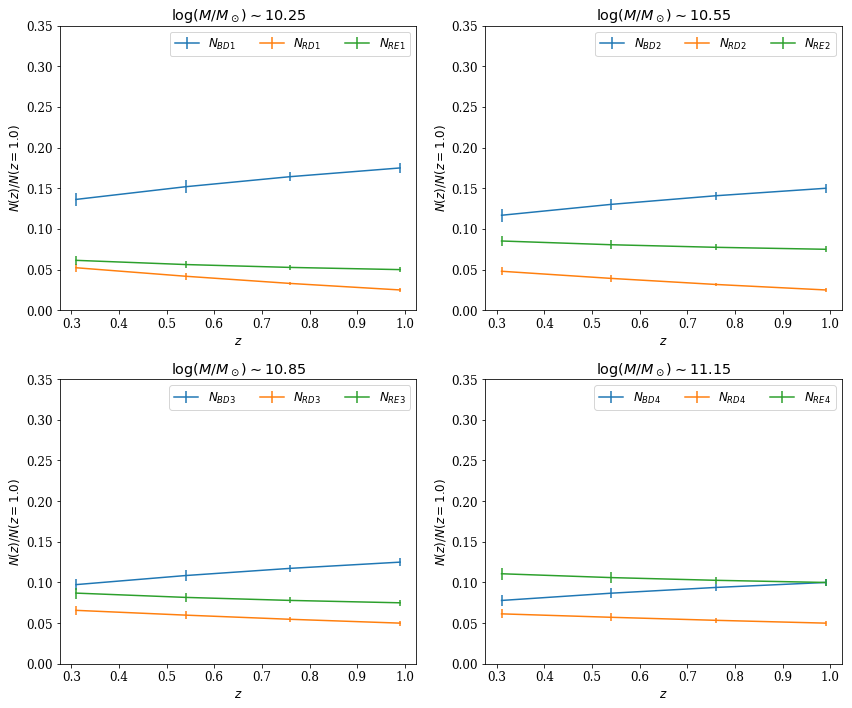

In [33]:
plot_N(Ndata, Nerr)

In [34]:
def plot_F(F, Ferr, Ffit=None):
    fig, axarr = plt.subplots(1, 2, figsize=(12, 5))
    axarr = axarr.flat
    Fm = F.filter(regex=('.*R.D,[1234].*'))
    Ferrm = Ferr.filter(regex=('.*R.D,[1234].*'))
    if Ffit is not None:
        Ffitm = Ffit.filter(regex=('.*R.D,[1234].*'))        
    for j, col in enumerate(Fm):
        axarr[0].errorbar(Fm.index, Fm[col], Ferrm[col], label=col, color='C{}'.format(j))
        if Ffit is not None:
            axarr[0].plot(Ffitm.index, Ffitm[col], '--', color='C{}'.format(j))
    axarr[0].set(xlabel='$z$', ylabel='$f_{R|D}(z)$',
              ylim=(0, 0.7))
    axarr[0].legend(loc=1, ncol=4)
    Fm = F.filter(regex=('.*D.R,[1234].*'))
    Ferrm = Ferr.filter(regex=('.*D.R,[1234].*'))
    if Ffit is not None:
        Ffitm = Ffit.filter(regex=('.*D.R,[1234].*'))        
    for j, col in enumerate(Fm):
        axarr[1].errorbar(Fm.index, Fm[col], Ferrm[col], label=col, color='C{}'.format(j))
        if Ffit is not None:
            axarr[1].plot(Ffitm.index, Ffitm[col], '--', color='C{}'.format(j))
    axarr[1].set(xlabel='$z$', ylabel='$f_{D|R}(z)$',
              ylim=(0, 0.7))
    axarr[1].legend(loc=1, ncol=4)
    plt.tight_layout()

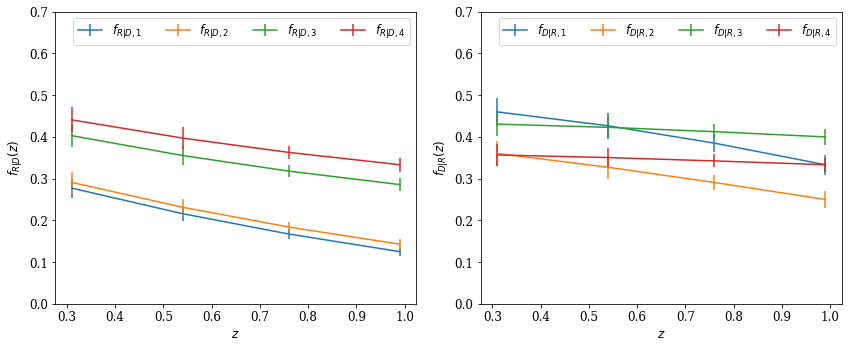

In [35]:
plot_F(Fdata, Ferr)

In [113]:
class logProbabilities:
    def __init__(self, fit_N0, fit_rates, fit_rates_evol, Nmask,
                 Ndata, Nerr, tdata, ratefn, N0_init, rates_init, rates_evol_init,
                 t0, N_labels, rate_labels, rate_evol_labels):
        # a boolean matrix describing which rates and evolutions to fit
        self.fit_N0 = fit_N0.copy()
        self.nFitN0 = self.fit_N0.values.sum()
        self.fit_rates = fit_rates.copy()
        self.nStates = len(fit_rates)
        self.nFitRates = self.fit_rates.values.sum()
        if rates_evol_init is not None:
            self.fit_rates_evol = fit_rates_evol.copy()
            self.nFitRatesEvol = self.fit_rates_evol.values.sum()
        else:
            self.fit_rates_evol = None
            self.nFitRatesEvol = 0
        self.pars = []
        self.pars.extend(N_labels.values[self.fit_N0.values])
        self.pars.extend(rate_labels.values[self.fit_rates.values])
        if rates_evol_init is not None:
            self.pars.extend(rate_evol_labels.values[self.fit_rates_evol.values])
        self.pars = pd.DataFrame(self.pars, columns=['parameter'])
        self.nPar = self.nFitN0 + self.nFitRates + self.nFitRatesEvol
        # the measured number density, Ndata,
        # in each state at time, tdata,
        # with its error, Nerr
        self.Ndata = Ndata.copy()
        self.Nerr = Nerr.copy()        
        self.tdata = tdata.copy()
        # the current rate matrix is determined using ratefn
        # from N0, the number densities at t0; rates, the rates at t0; and rates_evol
        self.ratefn = ratefn
        self.N0_init = N0_init.copy()
        self.N0 = N0_init.copy()
        self.rates = rates_init.copy()
        if rates_evol_init is not None:
            self.rates_evol = rates_evol_init.copy()
        else:
            self.rates_evol = None
        self.t0 = t0
        # Which states are actually measured
        self.Nmask = Nmask

    def split_pars(self, p):
        start, end = (0, self.nFitN0)
        p_N0 = p[start:end]
        start, end = (end, end + self.nFitRates)
        p_rates = p[start:end]
        start, end = (end, end + self.nFitRatesEvol)
        p_rates_evol = p[start:end]
        return p_N0, p_rates, p_rates_evol
        
    def evaluate(self, t, p, strip=True):
        # update the model quantities given the current parameters
        p_N0, p_rates, p_rates_evol = self.split_pars(p)
        self.N0.values[self.fit_N0.values] = p_N0
        self.rates.values[self.fit_rates.values] = p_rates
        if self.rates_evol is not None:
            self.rates_evol.values[self.fit_rates_evol.values] = p_rates_evol
        # compute N at each tdata, given current parameters
        N0 = self.N0.values
        rates = self.rates.values    
        if self.rates_evol is None:
            rates_evol = None
        else:
            rates_evol = self.rates_evol.values
        N = odeint(model, N0, t,
                   args=(self.ratefn, rates, rates_evol, self.t0))
        if strip:
            # strip off unmeasured quantitites
            N = N[:, self.Nmask]
            # convert to normalised relative densities at each redshift after first
            N[1:] = (N[1:].T / N[1:].sum(1)).T
        return N
    
    def prior(self, inpars):
        inshape = inpars.shape
        inpars = inpars.reshape((-1, self.nPar))
        lnP = np.zeros(inpars.shape[0])
        for i, p in enumerate(inpars):
            p_N0, p_rates, p_rates_evol = self.split_pars(p)
            lnP[i] = stats.uniform(0, 1).logpdf(p_N0).sum()
            lnP[i] += stats.uniform(0, 1).logpdf(p_rates).sum()
            lnP[i] += norm_logpdf(p_rates_evol, 0, 0.1).sum()
        return lnP.reshape(inshape[:-1])
    
    def likelihood(self, inpars):
        inshape = inpars.shape
        inpars = inpars.reshape((-1, self.nPar))
        lnL = np.zeros(inpars.shape[0])
        for i, p in enumerate(inpars):
            N = self.evaluate(self.tdata, p)
            # calculate Likelihood of computed N given Ndata and Nerr
            lnL[i] = norm_logpdf(N, self.Ndata.values, self.Nerr.values).sum()
        return lnL.reshape(inshape[:-1])
    
    def posterior(self, inpars):
        lnL = self.likelihood(inpars)
        lnP = self.prior(inpars)
        return lnL + lnP
    
    def neg_posterior(self, inpars):
        return -self.posterior(inpars)
    
    def init_pars(self, shape):
        ip = np.zeros(shape + (self.nPar,))
        start, end = (0, self.nFitN0)
        ip[..., start:end] = (stats.uniform.rvs(0, 0.01, size=shape + (self.nFitN0,)) * 
                              self.N0_init.values[self.fit_N0.values])
        start, end = (end, end + self.nFitRates)
        ip[..., start:end] = stats.uniform.rvs(0, 0.1, size=shape + (self.nFitRates,))
        start, end = (end, end + self.nFitRatesEvol)
        ip[..., start:end] = stats.norm.rvs(0, 0.01, size=shape + (self.nFitRatesEvol,))
        return ip

Some optimisations notes

The update of `rates` in `rates_function` is expensive, especially as we are using `pandas`.  I have shortcut this in the case of no evolution, which gives a huge speed-up.  If we wanted evolution, this should be re-written to use raw np-arrays.  I tried using sparse arrays, but the problem is not 'sparse enough', so they result in a significant slow-down.

With the shortcut rates_function, the next most expensive thing is the dot product.  This is 25 times faster if we use raw numpy arrays instead of np.dot with `pandas` objects.  So, if there is no rates evolution, logProbabilities now converts rates and N to numpy arrays.

In [114]:
# Define initial values.
# Those to be fit will vary.
# The rest will be held fixed at their initial values.
N0_init = pd.Series(index=N_labels, data=N0, name=False)
rates_init = pd.DataFrame(index='to ' + states, columns='from ' + states,
                          data=np.zeros((nStates, nStates)))
#rates_evol_init = pd.DataFrame(index='to ' + states, columns='from ' + states,
#                               data=np.zeros((nStates, nStates)))
rates_evol_init = None

In [115]:
N0_init

$N_{BD0}$    1.000
$N_{RD0}$    0.000
$N_{RE0}$    0.000
$N_{BD1}$    0.175
$N_{RD1}$    0.025
$N_{RE1}$    0.050
$N_{BD2}$    0.150
$N_{RD2}$    0.025
$N_{RE2}$    0.075
$N_{BD3}$    0.125
$N_{RD3}$    0.050
$N_{RE3}$    0.075
$N_{BD4}$    0.100
$N_{RD4}$    0.050
$N_{RE4}$    0.100
$N_{BD5}$    0.000
$N_{RD5}$    0.000
$N_{RE5}$    0.000
$N_{NE}$     0.000
dtype: float64

In [116]:
rates_init

,from BD0,from RD0,from RE0,from BD1,from RD1,from RE1,from BD2,from RD2,from RE2,from BD3,from RD3,from RE3,from BD4,from RD4,from RE4,from BD5,from RD5,from RE5,from NE
to BD0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
to RD0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
to RE0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
to BD1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
to RD1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
to RE1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
to BD2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
to RD2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
to RE2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
to BD3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
rates_evol_init

In [118]:
Nmask = np.array(['1' in l or '2' in l or '3' in l or '4' in l for l in N_labels])

In [119]:
logProb = logProbabilities(fit_N0, fit_rates, fit_rates_evol, Nmask, Ndata, Nerr, tdata,
                           rates_function, N0_init, rates_init, None,
                           t0, N_labels, rate_labels, rate_evol_labels)

In [120]:
logProb.pars

,parameter
0,$N_{BD1}$
1,$N_{RD1}$
2,$N_{RE1}$
3,$N_{BD2}$
4,$N_{RD2}$
5,$N_{RE2}$
6,$N_{BD3}$
7,$N_{RD3}$
8,$N_{RE3}$
9,$N_{BD4}$


In [121]:
truth = list(N0[fit_N0])
truth += list(rates.values[fit_rates.values])
#truth += list(rates.values[fit_rates_evol.values])
truth

[0.17499999999999999,
 0.025000000000000001,
 0.050000000000000003,
 0.14999999999999999,
 0.025000000000000001,
 0.074999999999999997,
 0.125,
 0.050000000000000003,
 0.074999999999999997,
 0.10000000000000001,
 0.050000000000000003,
 0.10000000000000001,
 0.050000000000000003,
 0.01,
 0.029999999999999999,
 0.050000000000000003,
 0.01,
 0.029999999999999999,
 0.050000000000000003,
 0.01,
 0.029999999999999999,
 0.050000000000000003,
 0.01,
 0.029999999999999999]

In [122]:
logProb.posterior(np.vstack((logProb.init_pars((5,)), truth)))

array([-3229.68390075, -2866.26466687, -4843.04786813, -2590.76087043,
       -6139.41527612,   196.97036927])

In [123]:
logProb.posterior(np.array(truth))

196.97036927428547

In [124]:
start = truth * stats.norm.rvs(1, 0.1, size=len(truth))

In [125]:
logProb.posterior(np.array(start))

124.0043208869299

In [126]:
result = scipy.optimize.minimize(logProb.neg_posterior, start, tol=1e-4, method='Nelder-Mead', options={'maxiter': 10000})

In [127]:
result

 final_simplex: (array([[  1.70082264e-01,   2.55066582e-02,   5.03070178e-02,
          1.45918297e-01,   2.51059719e-02,   7.88233919e-02,
          1.21594815e-01,   4.97477351e-02,   7.56933180e-02,
          9.70706614e-02,   5.05544628e-02,   1.05849277e-01,
          5.00163843e-02,   2.81033585e-02,   1.41239629e-04,
          4.97558334e-02,   1.50182737e-02,   5.47812783e-04,
          5.63022827e-02,   4.21766355e-02,   5.40744617e-03,
          4.76489212e-02,   1.55570567e-03,   2.64329665e-02],
       [  1.70092367e-01,   2.55104752e-02,   5.03029478e-02,
          1.45907512e-01,   2.51069200e-02,   7.88201775e-02,
          1.21573883e-01,   4.97434284e-02,   7.56782517e-02,
          9.70723564e-02,   5.05434840e-02,   1.05858372e-01,
          5.00099098e-02,   2.81232523e-02,   1.46837792e-04,
          4.97872588e-02,   1.50263927e-02,   4.89576831e-04,
          5.63133796e-02,   4.22197598e-02,   5.38299305e-03,
          4.76879324e-02,   1.54444860e-03,   2.6428

In [128]:
Ndata

,$N_{BD1}$,$N_{RD1}$,$N_{RE1}$,$N_{BD2}$,$N_{RD2}$,$N_{RE2}$,$N_{BD3}$,$N_{RD3}$,$N_{RE3}$,$N_{BD4}$,$N_{RD4}$,$N_{RE4}$
0.99,0.175000,0.025000,0.050000,0.150000,0.025000,0.075000,0.125000,0.050000,0.075000,0.100000,0.050000,0.100000
0.76,0.164308,0.032994,0.052698,0.140836,0.031741,0.077423,0.117363,0.054712,0.077925,0.093890,0.053460,0.102650
0.54,0.151923,0.041844,0.056232,0.130220,0.039194,0.080586,0.108517,0.059838,0.081646,0.086813,0.057187,0.105999
0.31,0.136303,0.052299,0.061398,0.116831,0.047979,0.085189,0.097359,0.065724,0.086917,0.077888,0.061404,0.110708


In [129]:
Nfit = Ndata.copy()
Nfit[:] = logProb.evaluate(tdata, result.x)

In [134]:
Nfit

,$N_{BD1}$,$N_{RD1}$,$N_{RE1}$,$N_{BD2}$,$N_{RD2}$,$N_{RE2}$,$N_{BD3}$,$N_{RD3}$,$N_{RE3}$,$N_{BD4}$,$N_{RD4}$,$N_{RE4}$
0.99,0.170082,0.025507,0.050307,0.145918,0.025106,0.078823,0.121595,0.049748,0.075693,0.097071,0.050554,0.105849
0.76,0.163613,0.033135,0.053229,0.140368,0.031489,0.078056,0.116970,0.054775,0.078289,0.093378,0.053306,0.103391
0.54,0.155524,0.041657,0.056313,0.133429,0.038604,0.076839,0.111187,0.060244,0.080941,0.088762,0.056195,0.100305
0.31,0.145504,0.052133,0.060091,0.124832,0.047348,0.075320,0.104024,0.066953,0.084262,0.083043,0.059730,0.096760


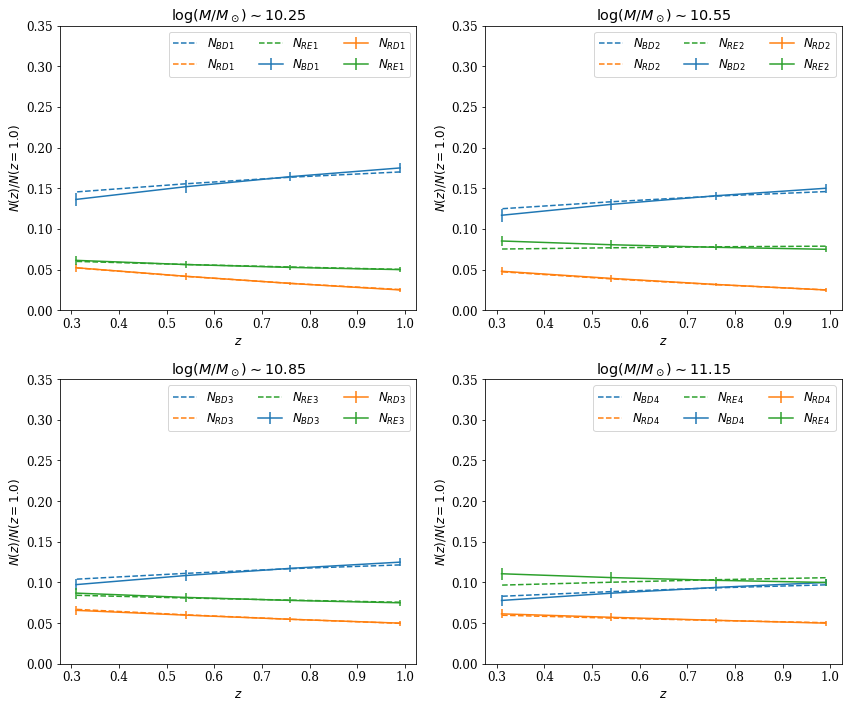

In [130]:
plot_N(Ndata, Nerr, Nfit)

In [131]:
Ffit = calc_F(Nfit)

In [132]:
Ffit

,"$f_{R|D,1}$","$f_{D|R,1}$","$f_{R|D,2}$","$f_{D|R,2}$","$f_{R|D,3}$","$f_{D|R,3}$","$f_{R|D,4}$","$f_{D|R,4}$"
0.99,0.130410,0.336439,0.146798,0.241568,0.290341,0.396583,0.342452,0.323231
0.76,0.168412,0.383664,0.183229,0.287454,0.318933,0.411643,0.363408,0.340187
0.54,0.211261,0.425200,0.224398,0.334397,0.351417,0.426702,0.387668,0.359075
0.31,0.263779,0.464543,0.274990,0.385984,0.391591,0.442766,0.418355,0.381685


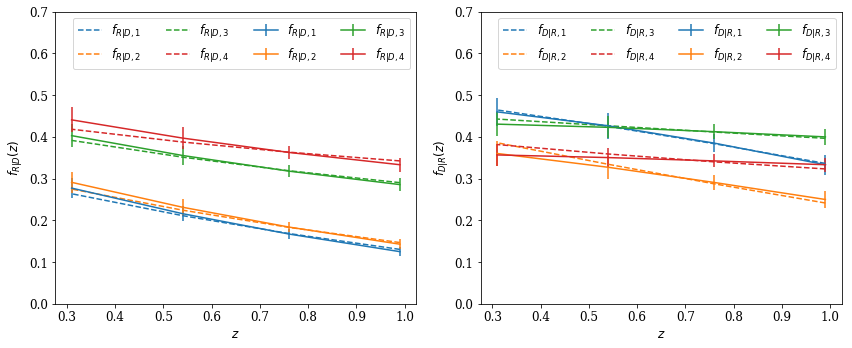

In [133]:
plot_F(Fdata, Ferr, Ffit)

In [135]:
sampler = run_emcee(logProb.likelihood, logProb.prior, logProb.init_pars,
                    ntemps=3, nwalkers=100, nsamples=1500,
                    minlogbeta=None, nupdates=150, threads=1,
                    outfilename='mel_bins_sim_simple', saveall=True)

Steps: 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500
Time taken = 928.07 secs


In [136]:
statistics = plots.print_emcee(sampler, logProb.pars['parameter'], nburn=750,
                               truths=truth, outfilename='mel_bins_sim_simple')

$N_{BD1}$        =     0.06 +- 0.02       (   0.175)
$N_{RD1}$        =    0.016 +- 0.007      (  0.0250)
$N_{RE1}$        =    0.017 +- 0.006      (  0.0500)
$N_{BD2}$        =     0.07 +- 0.02       (   0.150)
$N_{RD2}$        =    0.021 +- 0.008      (  0.0250)
$N_{RE2}$        =    0.023 +- 0.009      (  0.0750)
$N_{BD3}$        =     0.03 +- 0.01       (   0.125)
$N_{RD3}$        =    0.021 +- 0.008      (  0.0500)
$N_{RE3}$        =    0.022 +- 0.007      (  0.0750)
$N_{BD4}$        =    0.019 +- 0.006      (  0.1000)
$N_{RD4}$        =    0.024 +- 0.008      (  0.0500)
$N_{RE4}$        =     0.06 +- 0.02       (   0.100)
$r_{BD1 \rightarrow RD1}$ =     0.10 +- 0.04       (   0.050)
$r_{BD1 \rightarrow RE1}$ =     0.14 +- 0.10       (   0.010)
$r_{RD1 \rightarrow RE1}$ =      0.3 +- 0.2        (    0.03)
$r_{BD2 \rightarrow RD2}$ =     0.05 +- 0.02       (   0.050)
$r_{BD2 \rightarrow RE2}$ =     0.16 +- 0.08       (   0.010)
$r_{RD2 \rightarrow RE2}$ =      0.3 +- 0.2        (  

In [150]:
sampler = run_emcee(logProb.likelihood, logProb.prior, logProb.init_pars,
                    ntemps=5, nwalkers=100, nsamples=20000,
                    minlogbeta=None, nupdates=100, threads=1,
                    outfilename='mel_bins_sim_simple_long', saveall=True)

Steps: 200 400 600 800 1000 1200 1400 1600 1800 2000 2200 2400 2600 2800 3000 3200 3400 3600 3800 4000 4200 4400 4600 4800 5000 5200 5400 5600 5800 6000 6200 6400 6600 6800 7000 7200 7400 7600 7800 8000 8200 8400 8600 8800 9000 9200 9400 9600 9800 10000 10200 10400 10600 10800 11000 11200 11400 11600 11800 12000 12200 12400 12600 12800 13000 13200 13400 13600 13800 14000 14200 14400 14600 14800 15000 15200 15400 15600 15800 16000 16200 16400 16600 16800 17000 17200 17400 17600 17800 18000 18200 18400 18600 18800 19000 19200 19400 19600 19800 20000
Time taken = 18546.90 secs


In [151]:
statistics = plots.print_emcee(sampler, logProb.pars['parameter'], nburn=15000,
                               truths=truth, outfilename='mel_bins_sim_simple_long')

$N_{BD1}$        =    0.176 +- 0.004      (  0.1750)
$N_{RD1}$        =    0.025 +- 0.002      (  0.0250)
$N_{RE1}$        =    0.050 +- 0.003      (  0.0500)
$N_{BD2}$        =    0.151 +- 0.004      (  0.1500)
$N_{RD2}$        =    0.025 +- 0.002      (  0.0250)
$N_{RE2}$        =    0.075 +- 0.003      (  0.0750)
$N_{BD3}$        =    0.126 +- 0.003      (  0.1250)
$N_{RD3}$        =    0.050 +- 0.003      (  0.0500)
$N_{RE3}$        =    0.075 +- 0.003      (  0.0750)
$N_{BD4}$        =    0.101 +- 0.003      (  0.1000)
$N_{RD4}$        =    0.050 +- 0.003      (  0.0500)
$N_{RE4}$        =    0.099 +- 0.004      (  0.1000)
$r_{BD1 \rightarrow RD1}$ =    0.058 +- 0.008      (  0.0500)
$r_{BD1 \rightarrow RE1}$ =     0.02 +- 0.01       (   0.010)
$r_{RD1 \rightarrow RE1}$ =     0.09 +- 0.05       (   0.030)
$r_{BD2 \rightarrow RD2}$ =    0.059 +- 0.010      (  0.0500)
$r_{BD2 \rightarrow RE2}$ =     0.03 +- 0.02       (   0.010)
$r_{RD2 \rightarrow RE2}$ =     0.11 +- 0.07       (  

/home/ppzsb1/software/anaconda/envs/py3.6/lib/python3.6/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


In [152]:
Nfit = Ndata.copy()
Nfit[:] = logProb.evaluate(tdata, statistics['mean'])

In [153]:
Ndata

,$N_{BD1}$,$N_{RD1}$,$N_{RE1}$,$N_{BD2}$,$N_{RD2}$,$N_{RE2}$,$N_{BD3}$,$N_{RD3}$,$N_{RE3}$,$N_{BD4}$,$N_{RD4}$,$N_{RE4}$
0.99,0.175000,0.025000,0.050000,0.150000,0.025000,0.075000,0.125000,0.050000,0.075000,0.100000,0.050000,0.100000
0.76,0.164308,0.032994,0.052698,0.140836,0.031741,0.077423,0.117363,0.054712,0.077925,0.093890,0.053460,0.102650
0.54,0.151923,0.041844,0.056232,0.130220,0.039194,0.080586,0.108517,0.059838,0.081646,0.086813,0.057187,0.105999
0.31,0.136303,0.052299,0.061398,0.116831,0.047979,0.085189,0.097359,0.065724,0.086917,0.077888,0.061404,0.110708


In [154]:
Nfit

,$N_{BD1}$,$N_{RD1}$,$N_{RE1}$,$N_{BD2}$,$N_{RD2}$,$N_{RE2}$,$N_{BD3}$,$N_{RD3}$,$N_{RE3}$,$N_{BD4}$,$N_{RD4}$,$N_{RE4}$
0.99,0.176153,0.024842,0.049695,0.150950,0.024822,0.074606,0.125797,0.049786,0.074530,0.100565,0.049831,0.099178
0.76,0.164254,0.033182,0.052576,0.140753,0.031837,0.077284,0.117299,0.054823,0.078048,0.093772,0.053565,0.102606
0.54,0.151038,0.041964,0.056624,0.129428,0.039211,0.081134,0.107862,0.060015,0.082362,0.086227,0.057371,0.106763
0.31,0.135000,0.051679,0.062736,0.115685,0.047342,0.087015,0.096409,0.065525,0.088062,0.077071,0.061322,0.112153


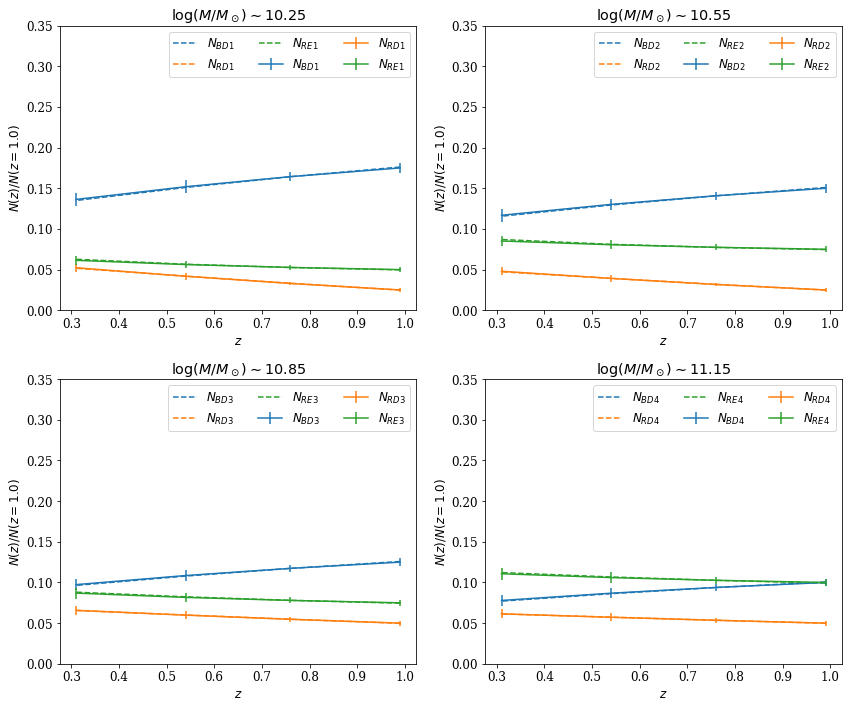

In [155]:
plot_N(Ndata, Nerr, Nfit)

In [156]:
Ffit = calc_F(Nfit)

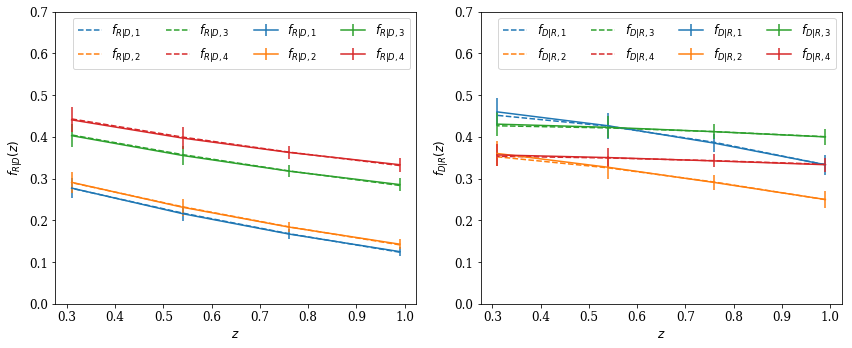

In [157]:
plot_F(Fdata, Ferr, Ffit)